# Multiple Linear Regression

### **Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

### - Analyze the relationship
### - Apply Multiple Linear Regression with dummy variable
### - Perform Simultant Test and Partial Test
### - Check the assumptions
### - Interpret the result
### - Use α 5% (α = 0.05)

**Try to find the best model without any multicollinearity, or at least the least one.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

## **Dataset info**
https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data

A data frame with 53940 rows and 10 variables:

1. price<br>
price in US dollars (\$326--\$18,823)
<br><br>
2. carat<br>
weight of the diamond (0.2--5.01)
<br><br>
3. cut<br>
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br><br>
4. color<br>
diamond colour, from J (worst) to D (best)
<br><br>
5. clarity<br>
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br><br>
6. x<br>
length in mm (0--10.74)
<br><br>
7. y<br>
width in mm (0--58.9)
<br><br>
8. z<br>
depth in mm (0--31.8)
<br><br>
9. depth<br>
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br><br>
10. table<br>
width of top of diamond relative to widest point (43--95)

In [2]:
# Load dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# Check numerical features statistical description
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **Create dummy variables**

In [5]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,True,...,False,False,True,False,False,False,False,False,True,False


## **Check correlation**

In [6]:
df_dummy.corr()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.116245,0.009568,0.034196,...,0.102465,0.161494,0.180054,-0.167571,-0.137024,-0.063094,-0.038904,0.062669,0.267483,0.120983
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.198306,0.025828,0.136114,...,0.026037,0.022630,0.022543,-0.023477,-0.019243,-0.024169,-0.009459,0.040899,0.007202,0.081135
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.338072,0.119971,0.175174,...,0.011574,0.017967,0.037253,-0.069103,-0.062273,-0.026858,-0.009655,0.051959,0.095344,0.044716
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.095706,0.006593,-0.000312,...,0.059223,0.097125,0.081710,-0.095266,-0.052381,-0.009886,-0.001062,0.008957,0.128420,-0.000255
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.126820,0.004569,0.030349,...,0.095896,0.146522,0.164658,-0.185253,-0.147151,-0.059882,-0.035507,0.079241,0.270827,0.108361
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.107943,0.016699,0.032187,...,0.093480,0.142895,0.160776,-0.179271,-0.141624,-0.056490,-0.035928,0.076097,0.263252,0.100736
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.090019,0.016039,0.045169,...,0.095041,0.145276,0.164217,-0.182401,-0.144746,-0.058513,-0.036314,0.081005,0.263192,0.111913
cut_Premium,0.116245,-0.198306,0.338072,0.095706,0.126820,0.107943,0.090019,1.000000,-0.314877,-0.185385,...,0.027895,0.005899,0.017231,-0.053852,-0.061949,-0.011866,0.022611,0.023275,0.067623,0.005676
cut_Very Good,0.009568,0.025828,0.119971,0.006593,0.004569,0.016699,0.016039,-0.314877,1.000000,-0.169940,...,-0.004437,-0.001549,0.009816,-0.005251,0.015284,-0.006849,-0.016412,0.032547,0.004806,-0.031317
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,-0.185385,-0.169940,1.000000,...,-0.009517,0.006187,0.014977,-0.037564,-0.038627,-0.017116,-0.021063,0.055938,0.041970,0.015844


In [7]:
df_dummy.corr()['price']

carat            0.921591
depth           -0.010647
table            0.127134
price            1.000000
x                0.884435
y                0.865421
z                0.861249
cut_Premium      0.095706
cut_Very Good    0.006593
cut_Good        -0.000312
cut_Fair         0.018728
color_E         -0.101089
color_F         -0.024161
color_G          0.008556
color_H          0.059223
color_I          0.097125
color_J          0.081710
clarity_VVS1    -0.095266
clarity_VVS2    -0.052381
clarity_VS1     -0.009886
clarity_VS2     -0.001062
clarity_SI1      0.008957
clarity_SI2      0.128420
clarity_I1      -0.000255
Name: price, dtype: float64

In [8]:
# Mengubah semua kolom boolean menjadi float64 menggunakan .apply()
df_dummy = df_dummy.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)

## **Select features**

In [9]:
df_dummy.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

### **Intrepretasi**

**x, y, z tidak digunakan sebagai inputan model karena memiliki korelasi yang tinggi dengan carat.**

In [10]:
# Membuat model OLS
fitur = ['carat', 'depth', 'table', 'cut_Good',
        'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']
target = 'price'
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 2.609e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:01:02   Log-Likelihood:            -4.6247e+05
No. Observations:               53940   AIC:                         9.250e+05
Df Residuals:                   53921   BIC:                         9.252e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8163.4518    351.693     23.212

In [12]:
# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes--', 'No')
    return (vif)

In [13]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,4.901432,No
1,depth,482.908224,No
2,table,501.859205,No
3,cut_Good,1.296646,Yes--
4,cut_Premium,2.017720,Yes--
5,cut_Very Good,1.658905,Yes--
6,color_E,2.453521,Yes--
7,color_F,2.438056,Yes--
8,color_G,2.763018,Yes--
9,color_H,2.304597,Yes--


### **Intrepretasi**

Dari hasil perhitungan nilai VIF di atas, dapat dilihat bahwa masih terdapat multicollinearity. Feature seperti **depth** dan **table** memiliki nilai VIF yang sangat tinggi. Oleh karena itu, kita coba untuk men-drop 2 fitur tersebut.

In [14]:
# Membuat model OLS dengan men-drop fitur depth dan table
fitur = ['carat', 'cut_Good', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

target = 'price'

sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 2.878e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:01:04   Log-Likelihood:            -4.6294e+05
No. Observations:               53940   AIC:                         9.259e+05
Df Residuals:                   53923   BIC:                         9.261e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2503.7355     31.387    -79.770

In [16]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,4.626179,No
1,cut_Good,1.228094,Yes--
2,cut_Premium,1.641653,Yes--
3,cut_Very Good,1.531243,Yes--
4,color_E,2.080929,Yes--
5,color_F,2.038130,Yes--
6,color_G,2.252233,Yes--
7,color_H,1.991506,Yes--
8,color_I,1.722783,Yes--
9,color_J,1.420903,Yes--


### **Intrepretasi**

Dari hasil perhitungan nilai VIF di atas, terlihat hanya carat, ada yang memiliki nilai VIF di atas 4.

Sekarang, mari kita coba untuk mencoba berbagai kombinasi, yaitu yang pertama dengan men-drop fitur cut, dan yang kedua dengan men-drop fitur clarity.

In [17]:
# Membuat model OLS dengan men-drop fitur cut
fitur = ['carat', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
target = 'price'
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 3.523e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:01:07   Log-Likelihood:            -4.6307e+05
No. Observations:               53940   AIC:                         9.262e+05
Df Residuals:                   53926   BIC:                         9.263e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2543.9696     31.281    -81.326   

In [19]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,4.560209,No
1,color_E,2.071531,Yes--
2,color_F,2.030442,Yes--
3,color_G,2.245189,Yes--
4,color_H,1.985513,Yes--
5,color_I,1.720701,Yes--
6,color_J,1.418589,Yes--
7,clarity_SI1,2.521937,Yes--
8,clarity_SI2,2.361101,Yes--
9,clarity_VS1,1.961082,Yes--


### **Intrepretasi**

Tanpa fitur 'cut', nilai VIF dari carat masih sedikit lebih dari 4.

In [20]:
# Membuat model OLS dengan men-drop fitur clarity
fitur = ['carat', 'cut_Good', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']
target = 'price'
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 3.471e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:01:08   Log-Likelihood:            -4.6966e+05
No. Observations:               53940   AIC:                         9.393e+05
Df Residuals:                   53929   BIC:                         9.394e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2019.1145     20.892    -96.644

In [22]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,3.622524,Yes--
1,cut_Good,1.185507,Yes--
2,cut_Premium,1.554632,Yes--
3,cut_Very Good,1.442946,Yes--
4,color_E,1.411359,Yes--
5,color_F,1.457389,Yes--
6,color_G,1.563247,Yes--
7,color_H,1.558518,Yes--
8,color_I,1.442552,Yes--
9,color_J,1.291070,Yes--


### **Intrepretasi**

Ternyata, dengan men-drop fitur clarity, kita mendapatkan nilai VIF di bawah 4 semua.

## **Cek Asumsi**

### **Asumsi-asumsi yang harus dipenuhi:**

1. **Linear relationship:** Terdapat hubungan linear antara variabel independen (x) dan variabel dependen (y).

2. **Independence:** Residuals bersifat independen atau tidak memiliki korelasi dengan residual lainnya.

3. **Homoscedasticity:** Residual memiliki variance yang konstan.

4. **Normality:** Residual dari model terdistribusi dengan normal.

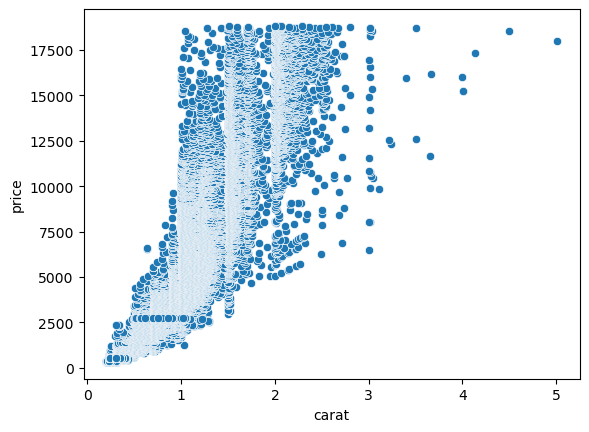

In [23]:
sns.scatterplot(x='carat', y='price', data=df_dummy);

### **Normality assumption**

/var/folders/gg/rk500yc90xb3bzx7502w43h40000gn/T/ipykernel_4746/2245137511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)
/Users/dzul_05/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


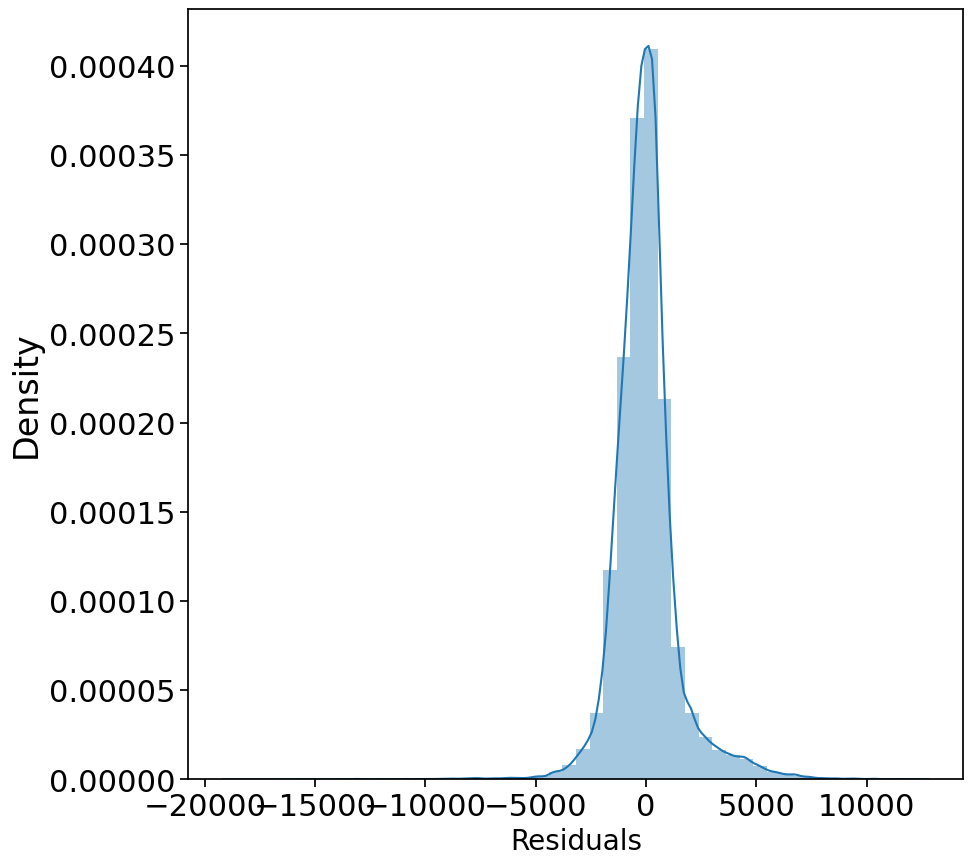

In [24]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20);

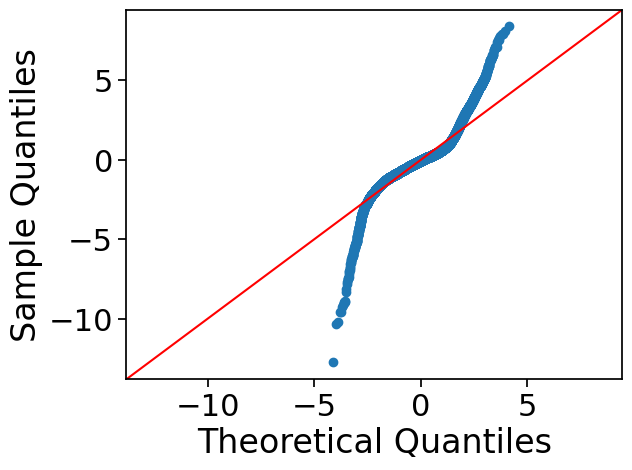

In [25]:
# Cek dengan menggunakan QQ plot
sm.qqplot(result.resid, line = '45', fit=True);

### **Interpretasi**

Kalau residualnya mengikuti garis merah 45 derajat, berarti residualnya mengikuti distribusi normal.

Tidak disarankan untuk menggunakan normal test pada dataset yang besar, karena pada dataset yang besar, hasil dari normaltest menjadi tidak dapat dipercaya karena hasilnya akan disimpulkan menjadi tidak normal. Jadi, lebih baik menggunakan visualisasi.

### **Cek asumsi Gauss-Markov**

Yang dilihat adalah errornya. Dengan asumsi:

* Rata-rata error pada populasi adalah nol.
* Error tidak berkorelasi dengan error lainnya.
* Error memiliki ragam yang homogen.

![](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

/Users/dzul_05/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dzul_05/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


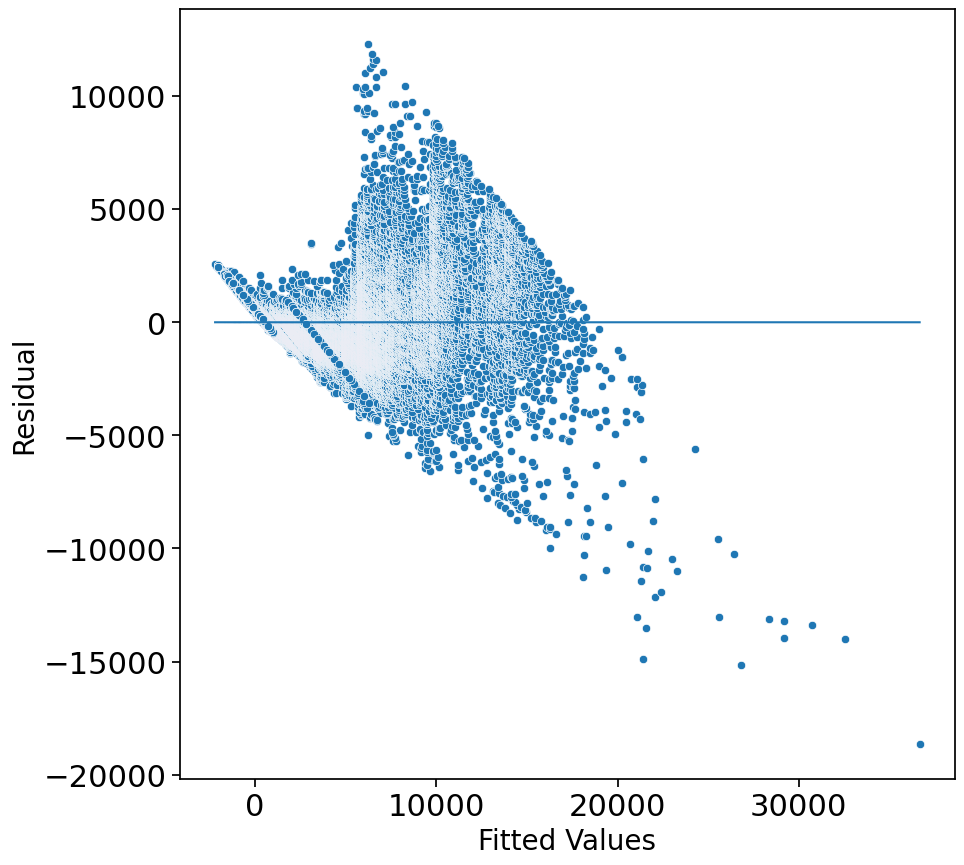

In [26]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(data = result, x = result.fittedvalues, y = result.resid)
sns.lineplot(data = result, x = result.fittedvalues, y = 0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20);

### **Interpretasi**

1. Jika melihat dari histogram, residual terlihat simetris, namun sangat menjulang (kurtosis tinggi). Setelah divalidasi dengan menggunakan QQ-plot, terlihat persebaran residualnya tidak mengikuti garis 45 derajat. Ini berarti, asumsi normalitas tidak terpenuhi.
2. Residual tersebar di sekitar 0. Ini berarti, asumsi Gauss-Markov masih terpenuhi.
3. Kalau berdasarkan gambar referensi, plot residual bersifat **bias** dan homoscedasticity.

Dengan kata lain, meskipun tidak terdapat multicollinearity (nilai VIF terpenuhi) dan juga adj. r-squared yang tinggi, namun kita tidak bisa terlalu percaya pada hasil prediksi yang diberikan oleh model. Hal ini disebabkan oleh adanya beberapa asumsi model linear regresi yang tidak terpenuhi, sehingga output model menjadi bias.